In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot,abline_plot

In [2]:
sns.set()

## 1. Descripción del dataset

In [13]:
df = pd.read_excel(r"C:\\Users\USUARIO\\Desktop\\Séptimo Semestre Julián\\Estadística 3\\Diseño de experimentos un solo factor\\ejemplo.xlsx")

df.head(5)

,Material,T_falla
0,A,19
1,A,20
2,A,19
3,A,30
4,A,12


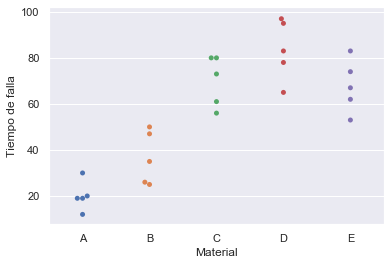

In [15]:
sns.swarmplot(x="Material", y="T_falla",data=df)
plt.xlabel("Material")
plt.ylabel("Tiempo de falla")
plt.show()

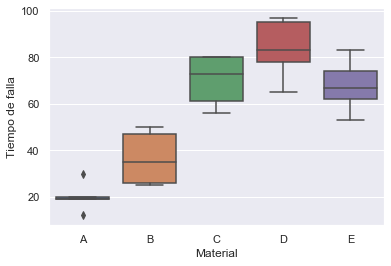

In [16]:
sns.boxplot(x="Material", y="T_falla",data=df)
plt.xlabel("Material")
plt.ylabel("Tiempo de falla")
plt.show()

In [18]:
df.groupby(by="Material").describe()

T_falla                                               
           count  mean        std   min   25%   50%   75%   max
Material                                                       
A            5.0  20.0   6.442049  12.0  19.0  19.0  20.0  30.0
B            5.0  36.6  11.588788  25.0  26.0  35.0  47.0  50.0
C            5.0  70.0  11.022704  56.0  61.0  73.0  80.0  80.0
D            5.0  83.6  13.107250  65.0  78.0  83.0  95.0  97.0
E            5.0  67.8  11.432410  53.0  62.0  67.0  74.0  83.0

## 2. ANOVA

In [26]:
modelo = ols("T_falla ~ C(Material)", data=df).fit()
anova = sm.stats.anova_lm(modelo)
print(anova)

               df   sum_sq  mean_sq          F        PR(>F)
C(Material)   4.0  13842.8  3460.70  28.848783  4.710164e-08
Residual     20.0   2399.2   119.96        NaN           NaN


## a. Supuesto de normalidad

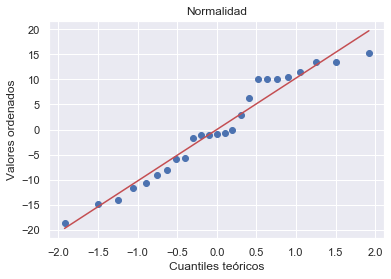

In [31]:
stats.probplot(modelo.resid,plot=plt)
plt.title("Normalidad")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.show()

In [34]:
SW = stats.shapiro(modelo.resid) #El segundo valor es el valor p
print(SW)  

(0.9464983344078064, 0.20880262553691864)


## b. Supuesto de independencia

In [35]:
import random

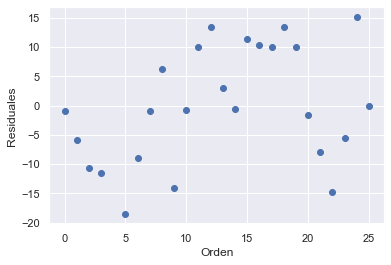

In [36]:
np.random.seed(6)

orden = random.sample(range(26),25)
plt.plot(orden, modelo.resid, marker=".", linestyle="none", markersize=12)
plt.xlabel("Orden")
plt.ylabel("Residuales")
plt.show()

## c. Supuesto de homocedasticidad

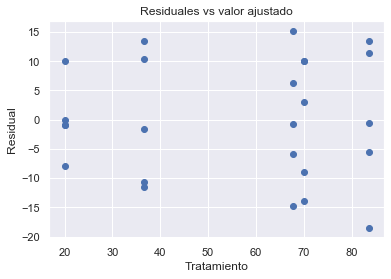

In [39]:
df["Medias"] = df.groupby(by="Material").transform("mean") # Crear una columna con las medias
resid = modelo.resid
plt.scatter(df["Medias"],resid)
plt.xlabel("Tratamiento")
plt.ylabel("Residual")
plt.title("Residuales vs valor ajustado")
plt.show()

In [40]:
df.head()

,Material,T_falla,Medias
0,A,19,20.0
1,A,20,20.0
2,A,19,20.0
3,A,30,20.0
4,A,12,20.0


In [41]:
# Prueba de levene para supuesto de homocedasticidad

stats.levene(df['T_falla'][df['Material'] == 'A'],
             df['T_falla'][df['Material'] == 'B'],
             df['T_falla'][df['Material'] == 'C'],
             df['T_falla'][df['Material'] == 'D'],
             df['T_falla'][df['Material'] == 'E'])

LeveneResult(statistic=0.7424557752341312, pvalue=0.574265959687781)

In [42]:
# Prueba de Barlett para evaluación de homocedasticidad

stats.bartlett(df['T_falla'][df['Material'] == 'A'],
             df['T_falla'][df['Material'] == 'B'],
             df['T_falla'][df['Material'] == 'C'],
             df['T_falla'][df['Material'] == 'D'],
             df['T_falla'][df['Material'] == 'E'])

BartlettResult(statistic=1.784990347917311, pvalue=0.7752272880514771)

## 4. Interpretación de resultados

In [43]:
import statsmodels.stats.multicomp as mc  # Se importa paquete para realizar comparaciones múltiples

###  Prueba de Tukey

In [44]:
comp = mc.MultiComparison(df["T_falla"], df["Material"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,16.6,0.1573,-4.1299,37.3299,False
A,C,50.0,0.001,29.2701,70.7299,True
A,D,63.6,0.001,42.8701,84.3299,True
A,E,47.8,0.001,27.0701,68.5299,True
B,C,33.4,0.001,12.6701,54.1299,True
B,D,47.0,0.001,26.2701,67.7299,True
B,E,31.2,0.0018,10.4701,51.9299,True
C,D,13.6,0.3186,-7.1299,34.3299,False
C,E,-2.2,0.9,-22.9299,18.5299,False
D,E,-15.8,0.1921,-36.5299,4.9299,False


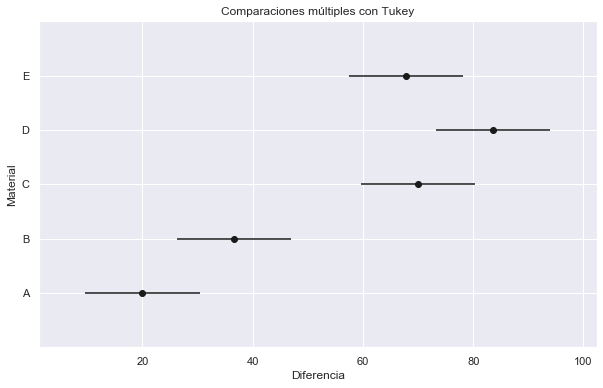

In [45]:
post_hoc_res.plot_simultaneous(ylabel="Material", xlabel="Diferencia")
plt.title("Comparaciones múltiples con Tukey");

### Prueba de Bonferroni

In [46]:
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method="bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
A,B,-2.7995,0.0232,0.2321,False
A,C,-8.7571,0.0,0.0002,True
A,D,-9.7375,0.0,0.0001,True
A,E,-8.1451,0.0,0.0004,True
B,C,-4.6696,0.0016,0.016,True
B,D,-6.0069,0.0003,0.0032,True
B,E,-4.2856,0.0027,0.0267,True
C,D,-1.7757,0.1137,1.0,False
C,E,0.3098,0.7647,1.0,False
D,E,2.0313,0.0767,0.767,False
